In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"

Snapshot_Init = 71
Snapshot_End = 99
Lbsg_Indcies_Array = np.array(
    [117251, 300903, 324123, 329508, 382215,
        400973, 419618, 457431, 460722, 490814]
)

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3


In [2]:
Current_Snapshot = 99
Subhalo_Index = 329508


In [3]:
PartType4_Fields = ['Coordinates', 'Masses', 'GFM_StellarFormationTime']
PartType4_Dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 4, PartType4_Fields)


In [4]:
Subhalo_Dict = il.groupcat.loadSingle(
    basePath, Current_Snapshot, -1, Subhalo_Index)


In [5]:
PartType4_Dict['Distance'] = np.linalg.norm(
    PartType4_Dict['Coordinates']-Subhalo_Dict['SubhaloPos'], axis=1)


Text(0.5, 1.0, 'Stellar Mass Distribution')

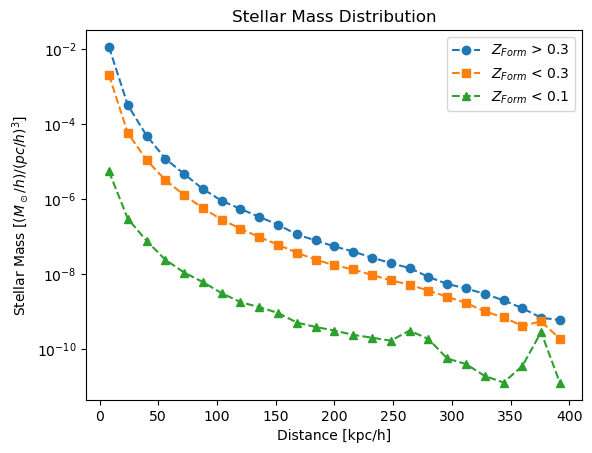

In [24]:
bins = 25
range = [0, 400]
condition1 = PartType4_Dict['GFM_StellarFormationTime'] > 0.3
hist1, binrange1 = np.histogram(PartType4_Dict['Distance'][np.where(condition1)[0]], range=(
    range), bins=bins, weights=PartType4_Dict['Masses'][np.where(condition1)[0]])
plt.semilogy((binrange1[:-1] + binrange1[1:]) / 2, hist1 / (4/30 * np.pi * (np.power(
    binrange1[1:], 3) - np.power(binrange1[:-1], 3))), '--o', label='$Z_{Form}$ > 0.3')

condition2 = PartType4_Dict['GFM_StellarFormationTime'] < 0.3
hist2, binrange2 = np.histogram(PartType4_Dict['Distance'][np.where(condition2)[0]], range=(
    range), bins=bins, weights=PartType4_Dict['Masses'][np.where(condition2)[0]])
plt.semilogy((binrange2[:-1] + binrange2[1:]) / 2, hist2 / (4/30 * np.pi * (np.power(
    binrange2[1:], 3) - np.power(binrange2[:-1], 3))), '--s', label='$Z_{Form}$ < 0.3')

condition3 = (PartType4_Dict['GFM_StellarFormationTime'] < 0.1)
hist3, binrange3 = np.histogram(PartType4_Dict['Distance'][np.where(condition3)[0]], range=(
    range), bins=bins, weights=PartType4_Dict['Masses'][np.where(condition3)[0]])
plt.semilogy((binrange3[:-1] + binrange3[1:]) / 2, hist3 / (4/30 * np.pi * (np.power(
    binrange3[1:], 3) - np.power(binrange3[:-1], 3))), '--^', label='$Z_{Form}$ < 0.1')


plt.legend()
plt.xlabel('Distance [kpc/h]')
plt.ylabel('Stellar Mass [$ (M_\odot/h)/(pc/h)^3$]')
plt.title('Stellar Mass Distribution')


In [27]:
PartType0_Fields = ['Coordinates', 'Masses',
                    'ElectronAbundance', 'InternalEnergy']
PartType0_Dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 0, PartType0_Fields)


In [28]:
x_e = PartType0_Dict['ElectronAbundance'].astype(np.float64)
internal_energy = PartType0_Dict['InternalEnergy'].astype(np.float64)
gas_cell_masses = PartType0_Dict['Masses'].astype(np.float64)

m_p = 1.673E-24
X_H = 0.76
unit_switching = 1E10
mean_molecular_weight = 4*m_p/(1+3*X_H+4*X_H*x_e)
k_B = 1.38E-16
gas_cell_temperature_in_Kelvin = 2/3*internal_energy / \
    k_B*unit_switching*mean_molecular_weight
PartType0_Dict['Temperature'] = gas_cell_temperature_in_Kelvin
PartType0_Dict['Distance'] = np.linalg.norm(
    PartType0_Dict['Coordinates']-Subhalo_Dict['SubhaloPos'], axis=1)


Text(0.5, 1.0, 'Gas Mass Distribution')

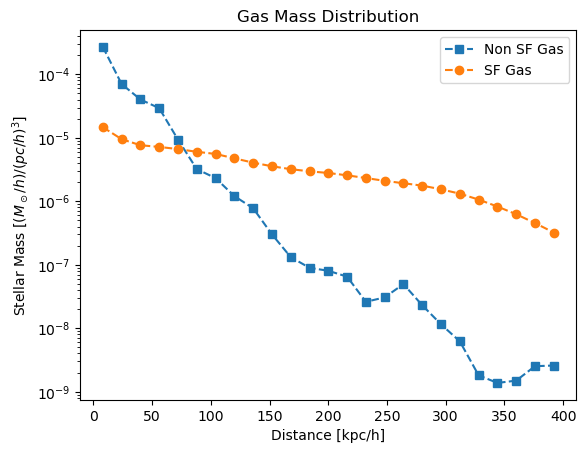

In [29]:
bins = 25
range = [0, 400]
condition1 = PartType0_Dict['Temperature'] < 15000
hist1, binrange1 = np.histogram(PartType0_Dict['Distance'][np.where(condition1)[0]], range=(
    range), bins=bins, weights=PartType0_Dict['Masses'][np.where(condition1)[0]])
plt.semilogy((binrange1[:-1] + binrange1[1:]) / 2, hist1 / (4/30 * np.pi * (np.power(
    binrange1[1:], 3) - np.power(binrange1[:-1], 3))), '--s', label='Non SF Gas')
condition2 = PartType0_Dict['Temperature'] > 100000
hist2, binrange2 = np.histogram(PartType0_Dict['Distance'][np.where(condition2)[0]], range=(
    range), bins=bins, weights=PartType0_Dict['Masses'][np.where(condition2)[0]])
plt.semilogy((binrange2[:-1] + binrange2[1:]) / 2, hist2 / (4/30 * np.pi * (np.power(
    binrange2[1:], 3) - np.power(binrange2[:-1], 3))), '--o', label='SF Gas')

plt.legend()
plt.xlabel('Distance [kpc/h]')
plt.ylabel('Stellar Mass [$ (M_\odot/h)/(pc/h)^3$]')
plt.title('Gas Mass Distribution')


In [26]:
(1-(PartType4_Dict['Masses'].max()-PartType4_Dict['Masses'])/PartType4_Dict['Masses'].max())


array([0.30753136, 0.37469202, 0.5165472 , ..., 0.42320442, 0.23684102,
       0.6075814 ], dtype=float32)